# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
#import seaborn as sns

from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

from sklearn.model_selection import train_test_split

import graphviz

import time

# Load data
 - HN16_ALL.sas7bdat : 설문지 데이터

In [2]:
df_data = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
print(df_data.shape)
df_data.head()

(8150, 768)


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE
0,2018.02.01.,A651172801,A6511728,2016.0,1.0,1.0,2.0,A651,1.0,61.0,...,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0,1.0,1.0
1,2018.02.01.,A651172802,A6511728,2016.0,1.0,1.0,2.0,A651,2.0,57.0,...,91.302698,1095.561039,0.005945,1.075103,0.756771,5.302599,31.845311,1.0,1.0,1.0
2,2018.02.01.,A651183001,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,41.0,...,261.852637,2147.567940,82.888642,1.093273,0.939505,16.655787,29.051934,1.0,2.0,2.0
3,2018.02.01.,A651183002,A6511830,2016.0,1.0,1.0,2.0,A651,1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.02.01.,A651183003,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 전처리

## 평균동맥압 파생변수 추가

In [3]:
df_data["HE_MAP"] = df_data[df_data.HE_dbp.name] + (df_data[df_data.HE_sbp.name] - df_data[df_data.HE_dbp.name]) / 3
df_data.shape

(8150, 769)

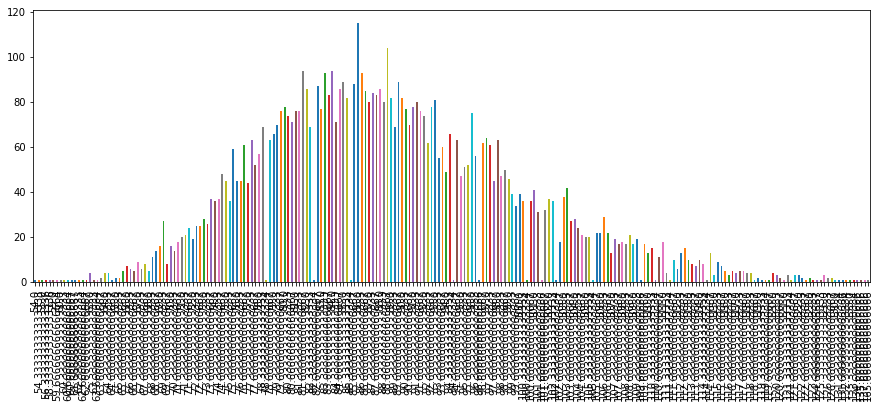

In [4]:
he_map_count = pd.value_counts(df_data.HE_MAP)
he_map_count.sort_index().plot(kind='bar', figsize=(15,5))

## 나이별 분포 확인

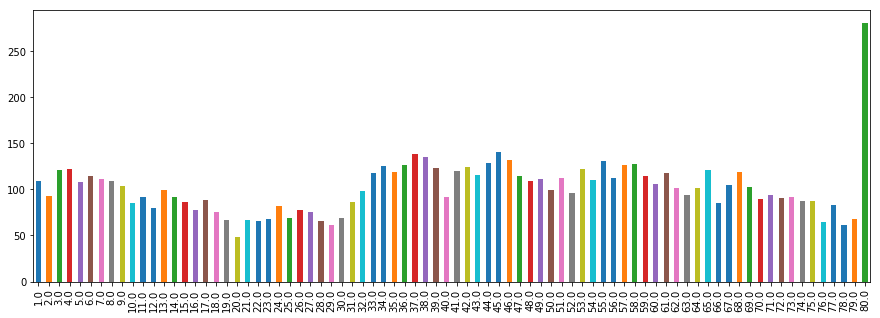

In [5]:
pd.value_counts(df_data.age).sort_index().plot(kind='bar', figsize=(15,5))

(4214, 769)


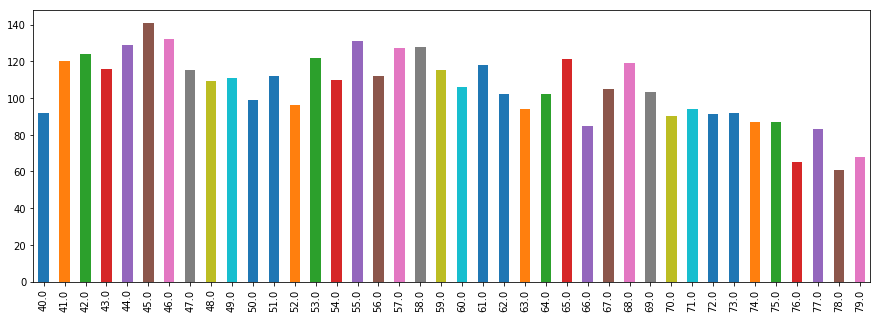

In [6]:
df_data = df_data.loc[ (40 <= df_data.age) & (df_data.age < 80) , :]
print(df_data.shape)
pd.value_counts(df_data.age).sort_index().plot(kind='bar', figsize=(15,5))

## 중요 컬럼 추출

In [7]:
df_data_cut = pd.DataFrame(df_data, columns=[
   # 1 groups
    
    #df_data.region.name ,
    #df_data.sex.name ,
    #df_data.age.name ,
    df_data.incm.name ,
    df_data.ho_incm.name ,
    df_data.edu.name ,
    df_data.occp.name ,
    df_data.cfam.name ,
    df_data.allownc.name ,
    df_data.house.name ,
    df_data.live_t.name ,
    df_data.ainc_1.name ,
    df_data.ainc.name ,
    df_data.marri_1.name ,
    df_data.marri_2.name ,
    df_data.tins.name ,
    df_data.npins.name ,

    # 3 groups
    
    df_data.LQ4_00.name ,
    df_data.LQ4_01.name ,
    df_data.LQ4_02.name ,
    df_data.LQ4_03.name ,
    df_data.LQ4_04.name ,
    df_data.LQ4_05.name ,
    df_data.LQ4_06.name ,
    df_data.LQ4_07.name ,
    df_data.LQ4_08.name ,
    df_data.LQ4_09.name ,
    df_data.LQ4_10.name ,
    df_data.LQ4_11.name ,
    df_data.LQ4_12.name ,
    df_data.LQ4_13.name ,
    df_data.LQ4_14.name ,
    df_data.LQ4_15.name ,
    df_data.LQ4_16.name ,
    df_data.LQ4_21.name ,
    df_data.LQ4_22.name ,
    df_data.LQ4_25.name ,
    df_data.LQ4_26.name ,
    df_data.LQ4_27.name ,
    df_data.LQ4_28.name ,
    df_data.LQ4_29.name ,
    df_data.LQ4_23.name ,
    df_data.LQ1_sb.name ,
    df_data.LQ1_mn.name ,
    df_data.LQ3_sb.name ,
    df_data.LQ3_mn.name ,
    df_data.LQ2_ab.name ,
    df_data.LQ2_mn.name ,
    df_data.LQ4_ab.name ,
    df_data.LQ4_mn.name ,
    df_data.LQ_1EQL.name ,
    df_data.LQ_2EQL.name ,
    df_data.LQ_3EQL.name ,
    df_data.LQ_4EQL.name ,
    df_data.LQ_5EQL.name ,
    df_data.AC1_yr.name ,
    df_data.AC3.name ,

    # 4 groups
    
    df_data.educ.name ,
    df_data.graduat.name ,
    df_data.EC1_1.name ,
    df_data.EC1_2.name ,
    df_data.EC_occp.name ,
    df_data.EC_stt_1.name ,
    df_data.EC_stt_2.name ,
    df_data.EC_wh.name ,
    df_data.EC_wht_0.name ,
    df_data.EC_wht_23.name ,
    df_data.EC_wht_5.name ,
    df_data.EC_lgw_2.name ,
    df_data.EC_lgw_4.name ,
    df_data.EC_lgw_5.name ,
    df_data.EC_pedu_1.name ,
    df_data.EC_pedu_2.name ,

    # 5 groups

    df_data.BO1.name ,
    df_data.BO1_1.name ,
    df_data.BO1_2.name ,
    df_data.BO1_3.name ,
    df_data.BO2_1.name ,
    df_data.BO3_01.name ,
    df_data.BO3_02.name ,
    df_data.BO3_03.name ,
    df_data.BO3_14.name ,
    df_data.BO3_05.name ,
    df_data.BO3_04.name ,
    df_data.BO3_12.name ,
    df_data.BO3_07.name ,
    df_data.BO3_09.name ,
    df_data.BO3_10.name ,

    # 6 groups

    df_data.BD1.name ,
    df_data.BD2.name ,
    df_data.BD1_11.name ,
    df_data.BD2_1.name ,
    df_data.BD2_31.name ,
    df_data.BD2_32.name ,
    df_data.BD7_4.name ,
    df_data.BD7_5.name ,
    df_data.BD7_6.name ,
    df_data.dr_month.name ,

    # 7 groups

    df_data.Total_slp_wk.name ,
    df_data.Total_slp_wd.name ,
    df_data.BP_PHQ_1.name ,
    df_data.BP_PHQ_2.name ,
    df_data.BP_PHQ_3.name ,
    df_data.BP_PHQ_4.name ,
    df_data.BP_PHQ_5.name ,
    df_data.BP_PHQ_6.name ,
    df_data.BP_PHQ_7.name ,
    df_data.BP_PHQ_8.name ,
    df_data.BP_PHQ_9.name ,
    df_data.mh_PHQ_S.name ,
    df_data.BP1.name ,
    df_data.BP5.name ,
    df_data.BP6_10.name ,
    df_data.BP6_2.name ,
    df_data.BP6_31.name ,
    df_data.BP7.name ,
    df_data.mh_stress.name ,

    # 8 groups

    df_data.BS1_1.name ,
    df_data.BS2_1.name ,
    df_data.BS3_1.name ,
    df_data.BS3_2.name ,
    df_data.BS3_3.name ,
    df_data.BS6_2.name ,
    df_data.BS6_2_1.name ,
    df_data.BS6_2_2.name ,
    df_data.BS6_3.name ,
    df_data.BS6_4.name ,
    df_data.BS6_4_1.name ,
    df_data.BS6_4_2.name ,
    df_data.BS5_4.name ,
    df_data.BS5.name ,
    df_data.BS5_1.name ,
    df_data.BS5_5.name ,
    df_data.BS5_21.name ,
    df_data.BS5_28.name ,
    df_data.BS5_26.name ,
    df_data.BS5_33.name ,
    df_data.BS5_34.name ,
    df_data.BS5_32.name ,
    df_data.BS5_29.name ,
    df_data.BS5_30.name ,
    df_data.BS8_2.name ,
    df_data.BS9_2.name ,
    df_data.BS13.name ,
    df_data.BS12_1.name ,
    df_data.BS12_2.name ,
    df_data.BS12_21.name ,
    df_data.BS12_31.name ,
    df_data.BS12_32.name ,
    df_data.BS12_33.name ,
    df_data.BS12_34.name ,
    df_data.BS12_36.name ,
    df_data.BS12_41.name ,
    df_data.BS12_42.name ,
    df_data.BS12_43.name ,
    df_data.BS12_44.name ,
    df_data.BS12_46.name ,

    # 9 groups

    df_data.BE3_71.name ,
    df_data.BE3_72.name ,
    df_data.BE3_73.name ,
    df_data.BE3_74.name ,
    df_data.BE3_81.name ,
    df_data.BE3_82.name ,
    df_data.BE3_83.name ,
    df_data.BE3_84.name ,
    df_data.BE3_91.name ,
    df_data.BE3_92.name ,
    df_data.BE3_93.name ,
    df_data.BE3_94.name ,
    df_data.BE3_75.name ,
    df_data.BE3_76.name ,
    df_data.BE3_77.name ,
    df_data.BE3_78.name ,
    df_data.BE3_85.name ,
    df_data.BE3_86.name ,
    df_data.BE3_87.name ,
    df_data.BE3_88.name ,
    df_data.BE8_1.name ,
    df_data.BE8_2.name ,
    df_data.BE3_31.name ,
    df_data.BE3_32.name ,
    df_data.BE3_33.name ,
    df_data.BE5_1.name ,
    df_data.pa_aerobic.name ,

    # 10 groups

    df_data.LW_ms.name ,
    df_data.LW_mp_a.name ,
    df_data.LW_ms_a.name ,
    df_data.LW_pr.name ,
    df_data.LW_pr_1.name ,
    df_data.LW_mt.name ,
    df_data.LW_mt_a1.name ,
    df_data.LW_mt_a2.name ,
    df_data.LW_br.name ,
    df_data.LW_br_ch.name ,
    df_data.LW_br_dur.name ,
    df_data.LW_oc.name ,

    # 11 groups

    df_data.HE_DMdg.name ,
    df_data.HE_DMdr.name ,
    df_data.HE_mens.name ,
    df_data.HE_prg.name ,
    df_data.HE_dprg.name ,
    df_data.HE_fh.name ,
    df_data.HE_HPfh1.name ,
    df_data.HE_HPfh2.name ,
    df_data.HE_HPfh3.name ,
    df_data.HE_HLfh1.name ,
    df_data.HE_HLfh2.name ,
    df_data.HE_HLfh3.name ,
    df_data.HE_IHDfh1.name ,
    df_data.HE_IHDfh2.name ,
    df_data.HE_IHDfh3.name ,
    df_data.HE_STRfh1.name ,
    df_data.HE_STRfh2.name ,
    df_data.HE_STRfh3.name ,
    df_data.HE_DMfh1.name ,
    df_data.HE_DMfh2.name ,
    df_data.HE_DMfh3.name ,
    df_data.HE_THfh1.name ,
    df_data.HE_THfh2.name ,
    df_data.HE_THfh3.name ,
    df_data.HE_HBfh1.name ,
    df_data.HE_HBfh2.name ,
    df_data.HE_HBfh3.name ,
    df_data.HE_rPLS.name ,
    df_data.HE_PLS.name ,
    df_data.HE_mPLS.name ,
    df_data.HE_nARM.name ,
    df_data.HE_ht.name ,
    df_data.HE_wt.name ,
    df_data.HE_wc.name ,
    df_data.HE_BMI.name ,
    df_data.HE_obe.name ,
    df_data.HE_glu.name ,
    df_data.HE_HbA1c.name ,
    df_data.HE_DM.name ,
    df_data.HE_chol.name ,
    df_data.HE_HDL_st2.name ,
    df_data.HE_TG.name ,
    df_data.HE_LDL_drct.name ,
    df_data.HE_HCHOL.name ,
    df_data.HE_HTG.name ,
    df_data.HE_HBsAg.name ,
    df_data.HE_ast.name ,
    df_data.HE_alt.name ,
    df_data.HE_hepaB.name ,
    df_data.HE_hcv.name ,
    df_data.HE_hepaC.name ,
    df_data.HE_HB.name ,
    df_data.HE_HCT.name ,
    df_data.HE_anem.name ,
    df_data.HE_BUN.name ,
    df_data.HE_crea.name ,
    df_data.HE_WBC.name ,
    df_data.HE_RBC.name ,
    df_data.HE_Bplt.name ,
    df_data.HE_hsCRP.name ,
    df_data.HE_Uacid.name ,
    df_data.HE_Pb.name ,
    df_data.HE_Hg.name ,
    df_data.HE_Cd.name ,
    df_data.HE_Uph.name ,
    df_data.HE_Unitr.name ,
    df_data.HE_Usg.name ,
    df_data.HE_Upro.name ,
    df_data.HE_Uglu.name ,
    df_data.HE_Uket.name ,
    df_data.HE_Ubil.name ,
    df_data.HE_Ubld.name ,
    df_data.HE_Uro.name ,
    df_data.HE_Ucot.name ,
    df_data.HE_UCREA.name ,
    df_data.HE_UNa.name ,
    df_data.HE_Ukal.name ,
    df_data.HE_fvc.name ,
    df_data.HE_fvcp.name ,
    df_data.HE_fev1.name ,
    df_data.HE_fev1p.name ,
    df_data.HE_fev1fvc.name ,
    df_data.HE_fev6.name ,
    df_data.HE_fef25_75.name ,
    df_data.HE_pef.name ,
    df_data.HE_COPD.name ,
    df_data.HE_cough1.name ,
    df_data.HE_cough2.name ,
    df_data.HE_sput1.name ,
    df_data.HE_sput2.name ,
    df_data.HE_PFTdr.name ,
    df_data.HE_PFTag.name ,
    df_data.HE_PFTtr.name ,
    df_data.HE_PFThs.name ,
    df_data.T_Q_HR.name ,
    df_data.T_Q_HR1.name ,
    df_data.T_Q_VN.name ,
    df_data.T_Q_VN1.name ,
    df_data.T_NQ_PH.name ,
    df_data.T_NQ_PH_T.name ,
    df_data.T_NQ_OCP.name ,
    df_data.T_NQ_OCP_T.name ,
    df_data.T_NQ_OCP_P.name ,
    df_data.T_NQ_LS.name ,
    df_data.T_NQ_LS_T.name ,
    df_data.T_NQ_FIR.name ,
    df_data.T_NQ_FIR_P.name ,
    df_data.L_BR_FQ.name ,
    df_data.L_LN_FQ.name ,
    df_data.L_DN_FQ.name ,
    df_data.LK_EDU.name ,
    df_data.LK_LB_CO.name ,
    df_data.LK_LB_US.name ,
    df_data.LK_LB_IT.name ,
    df_data.LK_LB_EF.name ,
    df_data.N_DIET.name ,
    df_data.N_DIET_WHY.name ,
    df_data.N_WAT_C.name ,
    df_data.N_PRG.name ,
    df_data.N_INTK.name ,
    df_data.N_EN.name ,
    df_data.N_WATER.name ,
    df_data.N_PROT.name ,
    df_data.N_FAT.name ,
    df_data.N_SFA.name ,
    df_data.N_MUFA.name ,
    df_data.N_PUFA.name ,
    df_data.N_N3.name ,
    df_data.N_N6.name ,
    df_data.N_CHOL.name ,
    df_data.N_CHO.name ,
    df_data.N_TDF.name ,
    df_data.N_CA.name ,
    df_data.N_PHOS.name ,
    df_data.N_FE.name ,
    df_data.N_NA.name ,
    df_data.N_K.name ,
    df_data.N_VA.name ,
    df_data.N_VA_RAE.name ,
    df_data.N_CAROT.name ,
    df_data.N_RETIN.name ,
    df_data.N_B1.name ,
    df_data.N_B2.name ,
    df_data.N_NIAC.name ,
    df_data.N_VITC.name ,
    df_data.LF_secur_y.name ,
    df_data.LF_BUYER.name ,
    df_data.LF_SAFE.name
])
total_column_count = df_data_cut.columns.size
print(total_column_count)
print(df_data_cut.shape)
df_data_cut.head()

341
(4214, 341)


,incm,ho_incm,edu,occp,cfam,allownc,house,live_t,ainc_1,ainc,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE
0,3.0,3.0,4.0,7.0,3.0,20.0,2.0,2.0,500.0,500.000000,...,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0,1.0,1.0
1,3.0,3.0,4.0,6.0,3.0,20.0,2.0,2.0,500.0,500.000000,...,91.302698,1095.561039,0.005945,1.075103,0.756771,5.302599,31.845311,1.0,1.0,1.0
2,3.0,3.0,4.0,1.0,5.0,20.0,3.0,2.0,600.0,600.000000,...,261.852637,2147.567940,82.888642,1.093273,0.939505,16.655787,29.051934,1.0,2.0,2.0
7,4.0,4.0,4.0,1.0,3.0,20.0,2.0,2.0,10000.0,833.333333,...,173.835874,1310.758919,64.605965,1.895480,1.083756,10.482916,101.660836,1.0,1.0,2.0
12,3.0,1.0,4.0,7.0,2.0,20.0,1.0,2.0,100.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 모든 값이 NaN인 경우 삭제

In [8]:
df_data_cut.dropna(how='all', inplace=True)
df_data_cut.reindex()
print(df_data_cut.shape)
df_data_cut.head()

(4214, 341)


,incm,ho_incm,edu,occp,cfam,allownc,house,live_t,ainc_1,ainc,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE
0,3.0,3.0,4.0,7.0,3.0,20.0,2.0,2.0,500.0,500.000000,...,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0,1.0,1.0
1,3.0,3.0,4.0,6.0,3.0,20.0,2.0,2.0,500.0,500.000000,...,91.302698,1095.561039,0.005945,1.075103,0.756771,5.302599,31.845311,1.0,1.0,1.0
2,3.0,3.0,4.0,1.0,5.0,20.0,3.0,2.0,600.0,600.000000,...,261.852637,2147.567940,82.888642,1.093273,0.939505,16.655787,29.051934,1.0,2.0,2.0
7,4.0,4.0,4.0,1.0,3.0,20.0,2.0,2.0,10000.0,833.333333,...,173.835874,1310.758919,64.605965,1.895480,1.083756,10.482916,101.660836,1.0,1.0,2.0
12,3.0,1.0,4.0,7.0,2.0,20.0,1.0,2.0,100.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 특정 value 값을 NaN 처리

In [150]:
def setNanValues(in_df, name, nan_values) :
    
    start_na_count = in_df[name].isna().sum()
    
    uniq_values = sorted(map(float,in_df[name].dropna().unique()))
    
    in_df[name] = in_df[name].map(lambda x: np.nan if x in nan_values else x)
        
    #print(sorted(map(float,in_df[name].dropna().unique())))
        
    end_na_count = in_df[name].isna().sum()
    
    print("%s NaN count %s -> %s" % (name,start_na_count,end_na_count))
    
    return in_df

nan_df_data = df_data_cut.copy(deep=True)

nan_df_data = setNanValues(nan_df_data, nan_df_data.marri_2.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_pedu_1.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_pedu_2.name, [88.0, 99.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_00.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_01.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_02.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_03.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_04.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_05.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_06.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_07.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_08.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_09.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_10.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_11.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_12.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_13.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_14.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_15.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_16.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_21.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_22.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_25.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_26.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_27.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_28.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_29.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_23.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ1_sb.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ1_mn.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ3_sb.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ3_mn.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ2_ab.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ2_mn.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_ab.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_mn.name, [888.0, 999.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_1EQL.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_2EQL.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_3EQL.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_4EQL.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_5EQL.name, [9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.AC1_yr.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.AC3.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.educ.name, [99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.graduat.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC1_1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC1_2.name, [7.0, 8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_occp.name, [88.0, 99.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_stt_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_stt_2.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wh.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wht_0.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wht_23.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wht_5.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_lgw_2.name, [88.0, 99.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_lgw_4.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_lgw_5.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1_2.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1_3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO2_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_01.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_02.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_03.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_14.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_05.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_04.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_12.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_07.name, [8.0, 9.0])

print(nan_df_data.shape)
nan_df_data.columns

marri_2 NaN count 0 -> 130
EC_pedu_1 NaN count 144 -> 928
EC_pedu_2 NaN count 144 -> 799
LQ4_00 NaN count 144 -> 332
LQ4_01 NaN count 144 -> 3795
LQ4_02 NaN count 144 -> 3795
LQ4_03 NaN count 144 -> 3795
LQ4_04 NaN count 144 -> 3795
LQ4_05 NaN count 144 -> 3795
LQ4_06 NaN count 144 -> 3795
LQ4_07 NaN count 144 -> 3795
LQ4_08 NaN count 144 -> 3795
LQ4_09 NaN count 144 -> 3795
LQ4_10 NaN count 144 -> 3795
LQ4_11 NaN count 144 -> 3795
LQ4_12 NaN count 144 -> 3795
LQ4_13 NaN count 144 -> 3795
LQ4_14 NaN count 144 -> 3795
LQ4_15 NaN count 144 -> 3795
LQ4_16 NaN count 144 -> 3795
LQ4_21 NaN count 144 -> 3795
LQ4_22 NaN count 144 -> 3795
LQ4_25 NaN count 144 -> 3795
LQ4_26 NaN count 144 -> 3795
LQ4_27 NaN count 144 -> 3795
LQ4_28 NaN count 144 -> 3795
LQ4_29 NaN count 144 -> 3795
LQ4_23 NaN count 144 -> 3795
LQ1_sb NaN count 144 -> 333
LQ1_mn NaN count 144 -> 3922
LQ3_sb NaN count 144 -> 336
LQ3_mn NaN count 144 -> 3407
LQ2_ab NaN count 144 -> 144
LQ2_mn NaN count 144 -> 4112
LQ4_ab NaN count

Index(['incm', 'ho_incm', 'edu', 'occp', 'cfam', 'allownc', 'house', 'live_t',
       'ainc_1', 'ainc',
       ...
       'N_VA_RAE', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC', 'N_VITC',
       'LF_secur_y', 'LF_BUYER', 'LF_SAFE'],
      dtype='object', length=341)

## NaN 값 처리

In [151]:
'''
strategy = mean, median, most_frequent, constant
'''
def setNanImputer(in_df, name, strategy="mean") :
    
    tmp_df = pd.DataFrame(in_df[name], columns=[name])
    
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    in_df[name] = imp.fit_transform(tmp_df)
        
    print('%s null count %s, na count %s' % (name, in_df[name].isnull().sum(), in_df[name].isna().sum()))
    
    return in_df


imp_df = nan_df_data.copy(deep=True)

imputer_infos = [
      ['ainc', 'mean']
    , ['EC_wht_23', 'mean']
]

for name, strategy in imputer_infos :
    imp_df = setNanImputer(imp_df, name, strategy=strategy)

ainc null count 0, na count 0
EC_wht_23 null count 0, na count 0


## One-Hot Encoding

In [152]:
def addOneHotEncodingColumns(in_df, name) :
    
    uniq_values = sorted(map(float,in_df[name].dropna().unique()))
    
    dummie = pd.get_dummies(in_df[name], dummy_na=True)
    dummie.columns=['%s_ONE_%s' % (name,str(n)) for n in uniq_values] + ['%s_ONE_NaN' % name]
    
    one_hot_df = pd.concat([in_df,dummie],axis=1)    
    one_hot_df.drop(columns=[name], inplace=True)
    
    return one_hot_df

one_hot_df = imp_df.copy(deep=True)
print(one_hot_df.shape)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.incm.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.ho_incm.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.edu.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.occp.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_pedu_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_pedu_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.marri_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.marri_2.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_00.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_01.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_02.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_03.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_04.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_05.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_06.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_07.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_08.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_09.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_10.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_11.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_12.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_13.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_14.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_15.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_16.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_21.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_22.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_25.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_26.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_27.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_28.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_29.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_23.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ1_sb.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ1_mn.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ3_sb.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ3_mn.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ2_ab.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ2_mn.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_ab.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_mn.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_1EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_2EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_3EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_4EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_5EQL.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.AC1_yr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.AC3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.educ.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.graduat.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC1_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC1_2.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_occp.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_stt_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_stt_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_wh.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_wht_0.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_wht_5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_lgw_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_lgw_4.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_lgw_5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1_2.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1_3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO2_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_01.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_02.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_03.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_14.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_05.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_04.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_12.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_07.name)

print(one_hot_df.shape)
print(one_hot_df.columns)
one_hot_df.tail()

(4214, 341)
(4214, 705)
Index(['cfam', 'allownc', 'house', 'live_t', 'ainc_1', 'ainc', 'tins', 'npins',
       'EC_wht_23', 'BO3_09',
       ...
       'BO3_05_ONE_NaN', 'BO3_04_ONE_0.0', 'BO3_04_ONE_1.0', 'BO3_04_ONE_NaN',
       'BO3_12_ONE_0.0', 'BO3_12_ONE_1.0', 'BO3_12_ONE_NaN', 'BO3_07_ONE_0.0',
       'BO3_07_ONE_1.0', 'BO3_07_ONE_NaN'],
      dtype='object', length=705)


,cfam,allownc,house,live_t,ainc_1,ainc,tins,npins,EC_wht_23,BO3_09,...,BO3_05_ONE_NaN,BO3_04_ONE_0.0,BO3_04_ONE_1.0,BO3_04_ONE_NaN,BO3_12_ONE_0.0,BO3_12_ONE_1.0,BO3_12_ONE_NaN,BO3_07_ONE_0.0,BO3_07_ONE_1.0,BO3_07_ONE_NaN
8143,3.0,20.0,2.0,2.0,6000.0,500.0,10.0,1.0,40.312006,0.0,...,0,1,0,0,1,0,0,1,0,0
8145,3.0,10.0,2.0,2.0,150.0,150.0,20.0,2.0,8.000000,0.0,...,0,1,0,0,1,0,0,1,0,0
8146,3.0,10.0,2.0,2.0,150.0,150.0,20.0,2.0,40.312006,0.0,...,0,1,0,0,1,0,0,1,0,0
8147,4.0,20.0,3.0,2.0,12000.0,1000.0,20.0,1.0,40.312006,8.0,...,1,0,0,1,0,0,1,0,0,1
8148,4.0,20.0,3.0,2.0,12000.0,1000.0,20.0,1.0,25.000000,0.0,...,0,1,0,0,1,0,0,1,0,0


## 타입 변환

In [153]:
#one_hot_df[one_hot_df.sex.name] = one_hot_df[one_hot_df.sex.name].astype(int)

## 결측치가 하나 이상 있는 컬럼 확인

In [158]:
nan_names = one_hot_df.columns[one_hot_df.isna().any()]
print(nan_names.size)
print(list(nan_names))

258
['BO3_09', 'BO3_10', 'BD1', 'BD2', 'BD1_11', 'BD2_1', 'BD2_31', 'BD2_32', 'BD7_4', 'BD7_5', 'BD7_6', 'dr_month', 'Total_slp_wk', 'Total_slp_wd', 'BP_PHQ_1', 'BP_PHQ_2', 'BP_PHQ_3', 'BP_PHQ_4', 'BP_PHQ_5', 'BP_PHQ_6', 'BP_PHQ_7', 'BP_PHQ_8', 'BP_PHQ_9', 'mh_PHQ_S', 'BP1', 'BP5', 'BP6_10', 'BP6_2', 'BP6_31', 'BP7', 'mh_stress', 'BS1_1', 'BS2_1', 'BS3_1', 'BS3_2', 'BS3_3', 'BS6_2', 'BS6_2_1', 'BS6_2_2', 'BS6_3', 'BS6_4', 'BS6_4_1', 'BS6_4_2', 'BS5_4', 'BS5', 'BS5_1', 'BS5_5', 'BS5_21', 'BS5_28', 'BS5_26', 'BS5_33', 'BS5_34', 'BS5_32', 'BS5_29', 'BS5_30', 'BS8_2', 'BS9_2', 'BS13', 'BS12_1', 'BS12_2', 'BS12_21', 'BS12_31', 'BS12_32', 'BS12_33', 'BS12_34', 'BS12_36', 'BS12_41', 'BS12_42', 'BS12_43', 'BS12_44', 'BS12_46', 'BE3_71', 'BE3_72', 'BE3_73', 'BE3_74', 'BE3_81', 'BE3_82', 'BE3_83', 'BE3_84', 'BE3_91', 'BE3_92', 'BE3_93', 'BE3_94', 'BE3_75', 'BE3_76', 'BE3_77', 'BE3_78', 'BE3_85', 'BE3_86', 'BE3_87', 'BE3_88', 'BE8_1', 'BE8_2', 'BE3_31', 'BE3_32', 'BE3_33', 'BE5_1', 'pa_aerobic', 

[   0 ] BO3_09 NaN count 144


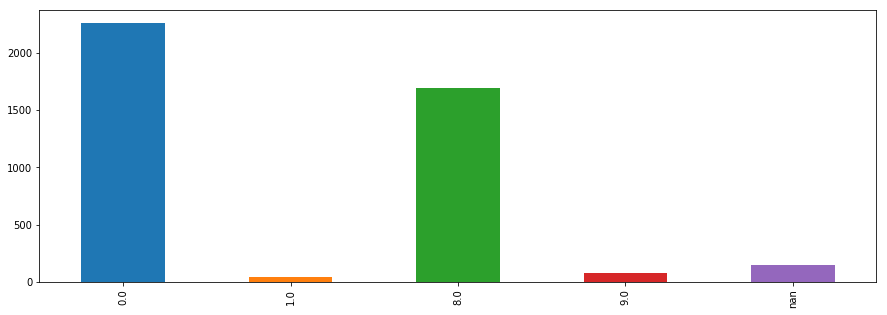

[   1 ] BO3_10 NaN count 144


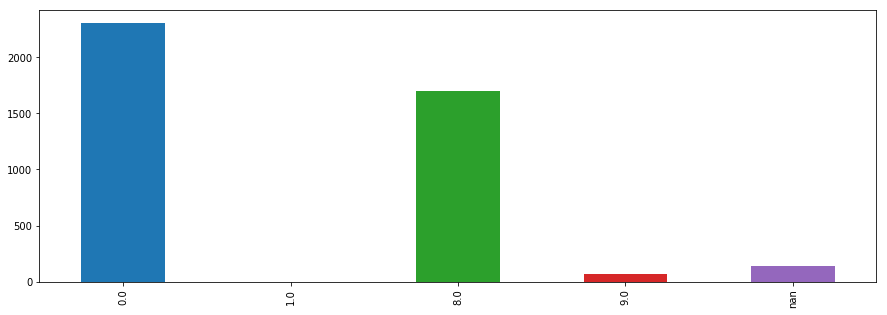

[   2 ] BD1 NaN count 144


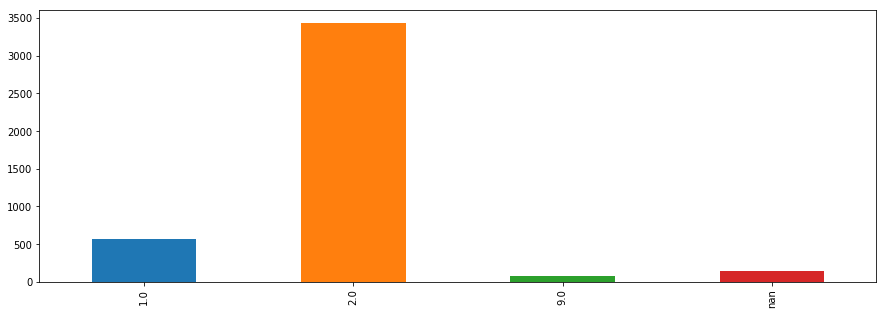

[   3 ] BD2 NaN count 144


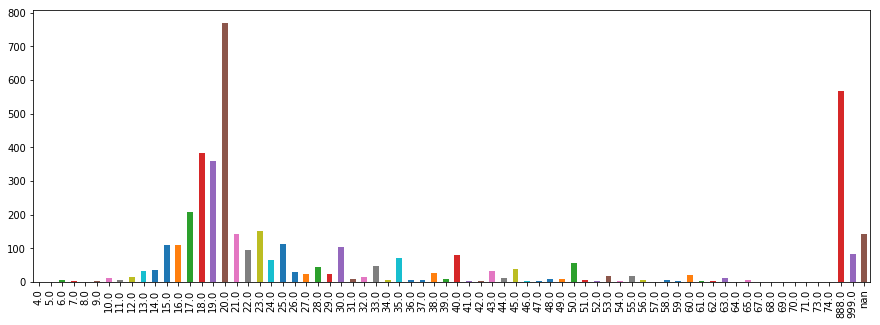

[   4 ] BD1_11 NaN count 144


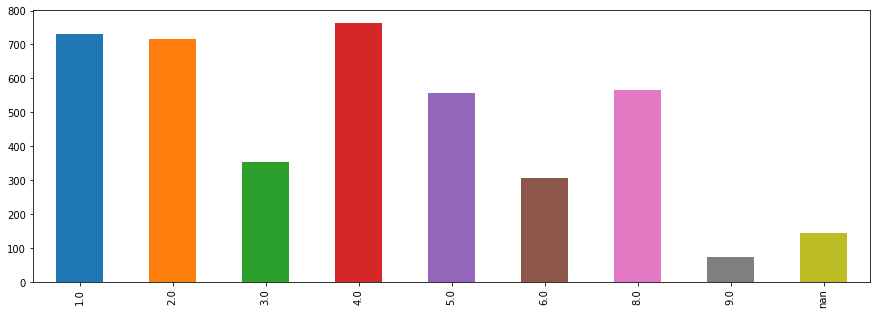

In [155]:
for index, name in enumerate(nan_names[:5]) :
    value_count = pd.value_counts(one_hot_df[name], dropna=False)
    nan_count = value_count[np.nan]
    print("[ %3d ] %s NaN count %s" % (index,name,nan_count))
    value_count.sort_index().plot(kind='bar', figsize=(15,5))
    plt.show()

# Train, Test data split

In [15]:
train_df, test_df = train_test_split(one_hot_df, test_size=0.25)
print(train_df.shape)
print(test_df.shape)

Y = one_hot_df.HE_HP.name
X = one_hot_df.columns.drop(Y).tolist()

(3160, 383)
(1054, 383)


AttributeError: 'DataFrame' object has no attribute 'HE_HP'

# Decision Tree Classifier

In [ ]:
def runDTR(x_name_list, y_name, train_df, test_df, max_depth=None) :
    
    stime = time.time()

    x_train_df = train_df[x_name_list]
    y_train_df = train_df[y_name]
    
    x_test_df = test_df[x_name_list]
    y_test_df = test_df[y_name]

    model = DecisionTreeClassifier(
          criterion = 'gini'
        , max_depth=max_depth
    ).fit(x_train_df,y_train_df)
    
    '''
    pdf_name = "./pdf_decision_tree_classifier_gini/target-%s_feature_count-%s_max_depth-%s" % (y_name,x_name_list.__len__(),max_depth)

    dot_data = tree.export_graphviz(model,
                                    out_file=None, 
                                    feature_names=x_name_list, 
                                    # class_names=['정상', '고혈압전단계', '고혈압']
                                    class_names=['1','2','3']
                                   )

    graph = graphviz.Source(dot_data) 
    graph.render(pdf_name)
    #graph.render("%s+%s" % (x_name,y_name))
    '''
    
    modelPrediction = model.predict(x_test_df)
    accuracyRate = accuracy_score(
        y_true=y_test_df
    ,   y_pred=modelPrediction
    )

    etime = time.time()
    
    print(pdf_name,', 정확도(%s) 소요시간(%s)' % (accuracyRate,etime-stime))
    
    return accuracyRate

In [ ]:
'''
maxdepth가 높으면 처리 속도가 늦음
maxdepth가 낮으면 처리 속도가 빠름
'''
for depth in range(one_hot_df.columns.size, 5, -1) :
    accuracy_rate = runDTR(X, Y, train_df, test_df, depth)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
      n_estimators=100
    , max_depth=20
    , random_state=0
)
clf.fit(train_df[X], train_df[Y])

for imp in zip(X,clf.feature_importances_) :
    print(imp)
print(clf.predict(test_df[X]))